# PCA step by step
[based on this article](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

reducing dimensions of dataset

In [1]:
import numpy as np

np.random.seed(2137) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

40 3-dimensional samples were randomly drawn from multivariate Gaussian distribution

Populating the interactive namespace from numpy and matplotlib


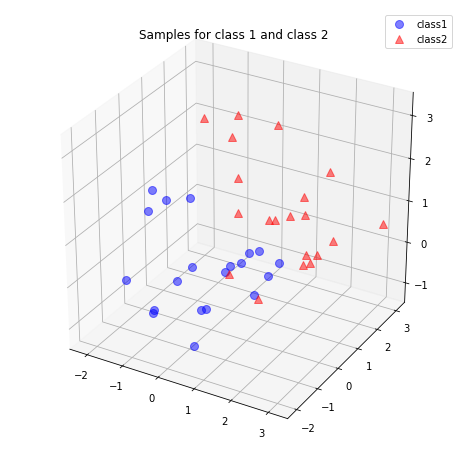

In [2]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()



# 1. Taking the whole dataset ignoring the class labels
Merging two datasets into one

In [3]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

# 2. Computing the d-dimensional mean vector
`np.mean()` seem to simply calculate arthimetric mean.

The arithmetic mean is the sum of the elements along the axis divided by the number of elements.

In [4]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.53519524]
 [ 0.58395008]
 [ 0.59253692]]


# 3. Computing the Scatter Matrix
The scatter matrix is computed by the following equation (`eq1`):
$$S = \sum\limits_{k=1}^n (\pmb x_k - \pmb m)\;(\pmb x_k - \pmb m)^T$$
where mm is the mean vector
$$\pmb m = \frac{1}{n} \sum\limits_{k=1}^n \; \pmb x_k$$
`().T` - returns the transpose of the matrix

`.dot()` - matrix multiplication

`.reshape()` - changes e.g. 

    [ 0.0462964  -0.92260395  0.46958469]

    to 

    [[ 0.0462964 ]
     [-0.92260395]
     [ 0.46958469]]
     
    Then, each value from this array is subtracted by mean_vector

In [5]:
scatter_matrix = np.zeros((3,3)) # returns array filled with zeros
for i in range(all_samples.shape[1]): # run 40 times
    eq1 = (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
    # print(i)
    # print(all_samples[:,i])
    # print(all_samples[:,i].reshape(3,1))
    # print(all_samples[:,i].reshape(3,1) - mean_vector)
    # print(eq1)
    scatter_matrix += eq1
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 70.18137407  17.59173308   9.88586418]
 [ 17.59173308  48.58839528  10.1332849 ]
 [  9.88586418  10.1332849   56.65396398]]


# Computing the Covariance Matrix (alternatively to the scatter matrix)

In [6]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.79952241  0.45107008  0.2534837 ]
 [ 0.45107008  1.24585629  0.25982782]
 [ 0.2534837   0.25982782  1.45266574]]


# 4. Computing eigenvectors and corresponding eigenvalues

In [7]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.77408173]
 [-0.47378443]
 [-0.41991164]]
Eigenvalue 1 from scatter matrix: 86.31129705178947
Eigenvalue 1 from covariance matrix: 2.2131101808151152
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.49416083]
 [ 0.03757666]
 [ 0.86855804]]
Eigenvalue 2 from scatter matrix: 51.467860526292775
Eigenvalue 2 from covariance matrix: 1.3196887314434045
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.3957304 ]
 [-0.8798388 ]
 [ 0.26321311]]
Eigenvalue 3 from scatter matrix: 37.64457575841267
Eigenvalue 3 from covariance matrix: 0.9652455322669924
Scaling factor:  39.0
----------------------------------------


Checking the eigenvector-eigenvalue calculation

In [8]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Visualizing the eigenvectors

Populating the interactive namespace from numpy and matplotlib


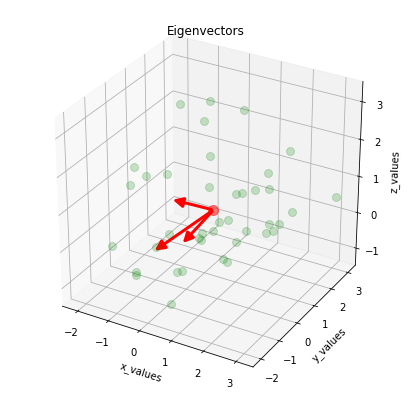

In [9]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

# 5.1. Sorting the eigenvectors by decreasing eigenvalues

In order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

86.3112970518
51.4678605263
37.6445757584


# 5.2. Choosing k eigenvectors with the largest eigenvalues

In [11]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.77408173 -0.49416083]
 [-0.47378443  0.03757666]
 [-0.41991164  0.86855804]]


# 6. Transforming the samples onto the new subspace

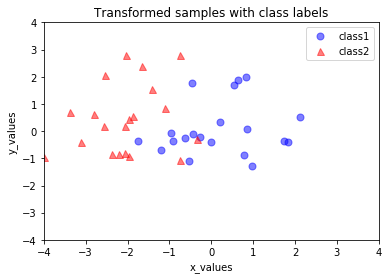

In [12]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the matplotlib.mlab library

    Attrs:

    a : a centered unit sigma version of input a

    numrows, numcols: the dimensions of a

    mu : a numdims array of means of a

    sigma : a numdims array of atandard deviation of a

    fracs : the proportion of variance of each of the principal components

    Wt : the weight vector for projecting a numdims point or array into PCA space

    Y : a projected into PCA space

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.60410351  0.62814178  0.49040479]
 [-0.4399716  -0.25020203  0.86245228]
 [ 0.66444258 -0.73677463  0.12521662]]


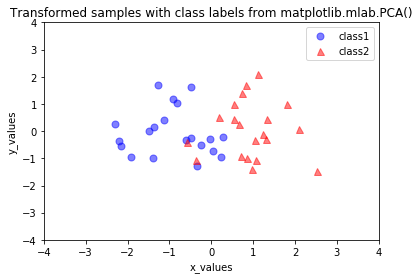

In [13]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# Using the PCA() class from the sklearn.decomposition library to confirm our results

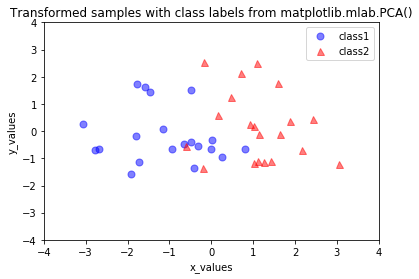

In [14]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

The plot above seems to be the exact mirror image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1) to revert the mirror image.

# Step by step vs sklean PCA() comparision

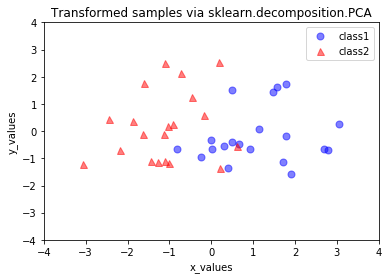

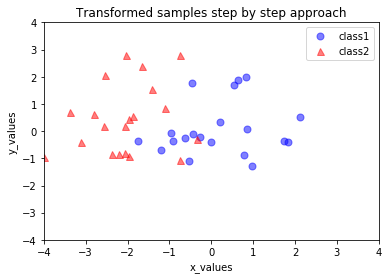

In [18]:
sklearn_transf = sklearn_transf

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0]*(-1),sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0]*(-1), sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()